### Naive Bayes Classifier

Make a Naive Bayes classifier that classify the following data:

In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = sklearn.datasets.make_blobs(n_samples=2000, n_features=1, centers=2, random_state=1234, center_box =(-2, 2))
X = np.round(X, 1)

In [3]:
print(np.unique(X))

[-4.8 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6
 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1
 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4
  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.6]


In [6]:
print(X.shape)

(2000, 1)


In [7]:
print(y.shape)

(2000,)


In [5]:
p_d_48=np.sum(X==-4.8)/X.shape[0]
print(p_d_48)

0.0005


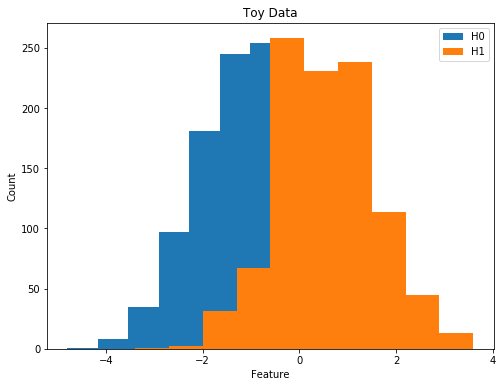

In [3]:
plt.figure(figsize=(8, 6))
plt.hist(X[y==0], label='H0')
plt.hist(X[y==1], label='H1')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Toy Data')
plt.show()

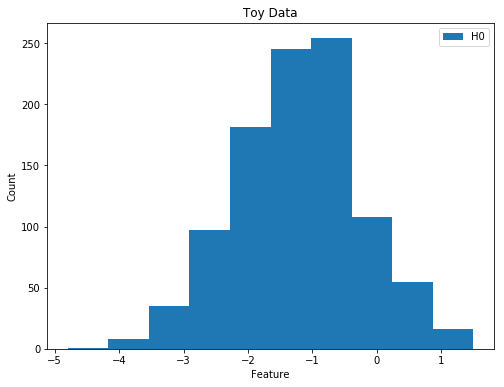

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(X[y==0], label='H0')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Toy Data')
plt.show()

In [10]:
print(np.unique(X[y==0, :]))

[-4.8 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6
 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1
 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 -0.   0.1  0.2  0.3  0.4
  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5]


$p(D|H_0)$

In [4]:
class naive_bayes(object):
    def __init__(self):
        self.p_h0 = 0
        self.p_h1 = 0
        self.p_d = dict()
        self.p_d_h0 = dict()
        self.p_d_h1 = dict()
        
    def fit(self, X, y):
        X = X[:, 0]
        n_sample = X.shape[0]
        self.p_h0 = np.sum(y == 0)/n_sample
        self.p_h1 = np.sum(y == 1)/n_sample
        d_unique = np.unique(X)
        for d in d_unique:
            self.p_d[d] = np.sum(X == d)/n_sample
            self.p_d_h0[d] = np.sum(np.all([X==d, y==0], axis=0))/n_sample
            self.p_d_h1[d] = np.sum(np.all([X==d, y==1], axis=0))/n_sample
            
    def plot_posterior(self, X):
        X = X[:, 0]
        x_unique = np.unique(X)
        p_h0_d = []
        p_h1_d = []
        for i in x_unique:
            p_h0_d.append(self.p_d_h0[i] * self.p_h0 / self.p_d[i])
            p_h1_d.append(self.p_d_h1[i] * self.p_h1 / self.p_d[i])
            
        plt.figure(figsize=(8, 6))
        plt.plot(x_unique, p_h0_d, label='p_h0_d')
        plt.plot(x_unique, p_h1_d, label='p_h1_d')
        plt.xlabel('Value')
        plt.ylabel('Posterior')
        plt.legend()
        plt.savefig('week2_posterior.png')
        plt.show()

$p(D|H_0)=\frac{p(H_0|D)p(D)}{P(H_0)}$

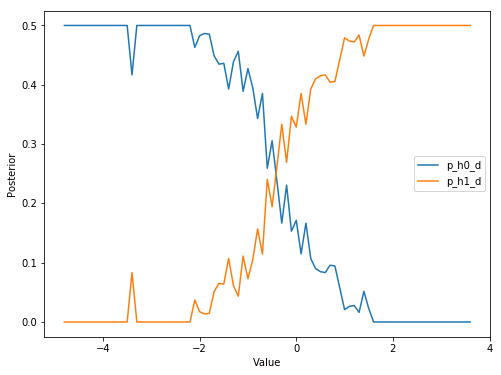

In [5]:
clf = naive_bayes()
clf.fit(X, y)
clf.plot_posterior(X)